In [160]:
using Plots
using LaTeXStrings
using DataFrames
using CSV
using LinearAlgebra

In [161]:
exp_full_data = CSV.read("ds07.csv", DataFrame)
power_full_data = CSV.read("ds07_power.csv", DataFrame)

power_data = parse.(Float64, power_full_data[!, 3][3:end])
power_data_sum = Array{Float64}(undef, 31)
for i in 1:31
    sum = 0.0
    for j in 24*(i-1)+1 : 24*i
        sum += power_data[j]
    end
    power_data_sum[i] = sum
end


temp_mean_data = parse.(Float64, exp_full_data[!, 2][4:34])
temp_max_data = parse.(Float64, exp_full_data[!, 5][4:34])
temp_min_data = parse.(Float64, exp_full_data[!, 10][4:34])
rain_data = parse.(Float64, exp_full_data[!, 15][4:34])
sun_data = parse.(Float64, exp_full_data[!, 19][4:34])
snow_data = parse.(Float64, exp_full_data[!, 23][4:34])
wind_data = parse.(Float64, exp_full_data[!, 27][4:34])
vapor_data = parse.(Float64, exp_full_data[!, 30][4:34])
humi_data = parse.(Float64, exp_full_data[!, 33][4:34])
pres_data = parse.(Float64, exp_full_data[!, 36][4:34])
;

In [162]:
test_data1 = [temp_mean_data[1], temp_max_data[1], temp_min_data[1], rain_data[1], sun_data[1], snow_data[1], wind_data[1], vapor_data[1], humi_data[1], pres_data[1]]
exact_data1 = power_data_sum[1]

test_data31 = [temp_mean_data[31], temp_max_data[31], temp_min_data[31], rain_data[31], sun_data[31], snow_data[31], wind_data[31], vapor_data[3], humi_data[31], pres_data[31]]
exact_data31 = power_data_sum[31]
;

In [163]:
param_array = []
Index = []
Error = []
AIC = []

for i1 in 0:1
    for i2 in 0:1
        for i3 in 0:1
            for i4 in 0:1
                for i5 in 0:1
                    for i6 in 0:1
                        for i7 in 0:1
                            for i8 in 0:1
                                for i9 in 0:1
                                    for i10 in 0:1
                                        num = 0
                                        if i1 == 0 && i2 == 0 && i3 == 0 && i4 == 0 && i5 == 0 && i6 == 0 && i7 == 0 && i8 == 0 && i9 == 0 && i10 == 0
                                        end
                                        if i1 == 1
                                            num += 1
                                        end
                                        if i2 == 1
                                            num += 1
                                        end
                                        if i3 == 1
                                            num += 1
                                        end
                                        if i4 == 1
                                            num += 1
                                        end
                                        if i5 == 1
                                            num += 1
                                        end
                                        if i6 == 1
                                            num += 1
                                        end
                                        if i7 == 1
                                            num += 1
                                        end
                                        if i8 == 1
                                            num += 1
                                        end
                                        if i9 == 1
                                            num += 1
                                        end
                                        if i10 == 1
                                            num += 1
                                        end

                                        A = Array{Float64}(undef, 31, num + 1)
                                        ind = 1
                                        sign = false

                                        if i1 == 0 && i2 == 0 && i3 == 0 && i4 == 0 && i5 == 0 && i6 == 0 && i7 == 0 && i8 == 0 && i9 == 0 && i10 == 0
                                        end
                                        if i1 == 1
                                            A[:, ind] = temp_mean_data
                                            ind += 1
                                            sign = true
                                        end
                                        if i2 == 1
                                            A[:, ind] = temp_max_data
                                            ind += 1
                                            sign = true
                                        end
                                        if i3 == 1
                                            A[:, ind] = temp_min_data
                                            ind += 1
                                            sign = true
                                        end
                                        if i4 == 1
                                            A[:, ind] = rain_data
                                            ind += 1
                                            sign = true
                                        end
                                        if i5 == 1
                                            A[:, ind] = sun_data
                                            ind += 1
                                            sign = true
                                        end
                                        if i6 == 1
                                            A[:, ind] = snow_data
                                            ind += 1
                                            sign = true
                                        end
                                        if i7 == 1
                                            A[:, ind] = wind_data
                                            ind += 1
                                            sign = true
                                        end
                                        if i8 == 1
                                            A[:, ind] = vapor_data
                                            ind += 1
                                            sign = true
                                        end
                                        if i9 == 1
                                            A[:, ind] = humi_data
                                            ind += 1
                                            sign = true
                                        end
                                        if i10 == 1
                                            A[:, ind] = pres_data
                                            ind += 1
                                            sign = true
                                        end
                                        
                                        if sign == true
                                            A[:, ind] = ones(31, 1)
                                            b_aic = power_data_sum[1:31]
                                            b_err = power_data_sum[2:30]
                                            A_aic = A[1:31, :]
                                            A_err = A[2:30, :]
                                            X_aic = (A_aic'*A_aic)^-1 *A_aic'*b_aic
                                            X_err= (A_err'*A_err)^-1 *A_err'*b_err
                                            
                                            push!(param_array, X_err)
                                            I = [i1, i2, i3, i4, i5, i6, i7, i8, i9, i10]
                                            push!(Index, I)
                                            
                                            #予測値を計算
                                            z1 = dot(X_err, A[1, :])
                                            error1 = abs(z1-exact_data1)/abs(exact_data1)

                                            z2 = dot(X_err, A[31, :])
                                            error2 = abs(z2-exact_data31)/abs(exact_data31)

                                            mean_error = 0.5*(error1 + error2)
                                            push!(Error, mean_error)
                                            
                                            #残差二乗を計算
                                            res_error = 0.0
                                            for i in 1:31
                                                res_error += (abs(dot(X_aic, A_aic[i, :]) - power_data_sum[i]))^2
                                            end
                                            aic = 31*(log(2*π*res_error*31) + 1) + 2*(num+2)
                                            push!(AIC, aic)
                                        end
                                    end
                                end
                            end
                        end
                    end
                end
            end
        end
    end
end

error_plot = Plot{Plots.GRBackend() n=2}


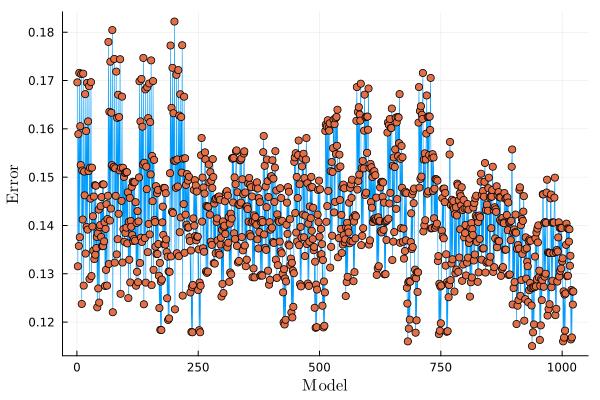

In [164]:
error_plot = plot(Error, 
                xlabel = L"\mathrm{Model}",
                ylabel = L"\mathrm{Error}",
                label = "", 
                lw = 0.6
                )
plot!(error_plot, Error, st = :scatter, label = "")
savefig("error_plot.pdf")
@show error_plot

In [165]:
@show findmin(Error)[1]
@show Index[findmin(Error)[2]]
@show param_array[findmin(Error)[2]];

(findmin(Error))[1] = 0.1150421352895797
Index[(findmin(Error))[2]] = [1, 1, 1, 0, 1, 0, 1, 0, 1, 0]
param_array[(findmin(Error))[2]] = [1843.772816377538, -723.6727760983607, -1557.4596847807452, -1148.6149892610078, 2394.352866024292, 224.93241155835972, 70660.36316258697]


AIC_plot = Plot{Plots.GRBackend() n=2}


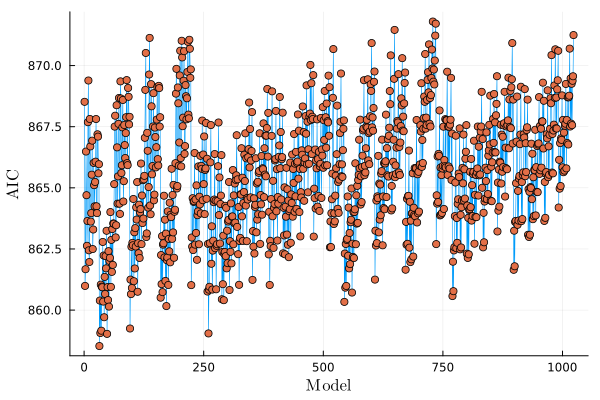

In [166]:
AIC_plot = plot(AIC, 
                xlabel = L"\mathrm{Model}",
                ylabel = L"\mathrm{AIC}",
                label = "", 
                lw = 0.6
                )
plot!(AIC_plot, AIC, st = :scatter, label = "")
savefig("AIC_plot.pdf")
@show AIC_plot

In [167]:
@show findmin(AIC)[1]
@show Index[findmin(AIC)[2]]
@show param_array[findmin(AIC)[2]];

(findmin(AIC))[1] = 858.5288819108291
Index[(findmin(AIC))[2]] = [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]
param_array[(findmin(AIC))[2]] = [-1185.552936715309, 91980.5099948861]
